<a href="https://colab.research.google.com/github/jefjoe95/Hamoye_Stage_E_Tagalong_code/blob/main/STAGE_E_CODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:/Users/hp/Documents/HAMOYE/Time_series_analysis_and_forecast_DATASET.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
df.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [ ]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0, 0.5, 'ElecPrice')

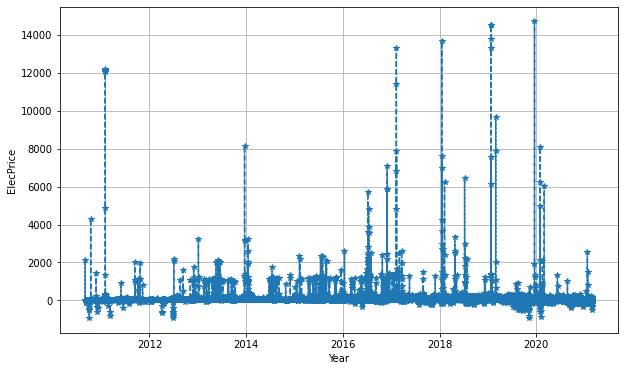

In [ ]:
# CONVERSION TO DATE
df["FullDate"] = pd.to_datetime(df["FullDate"])   # CONVERT COLUMN TO DATE
df.set_index("FullDate", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

In [ ]:
# DOWN-SAMPLING DATA TO DAILY DATA POINTS
df_daily = df.resample('D').sum()
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Text(0, 0.5, 'Daily active power')

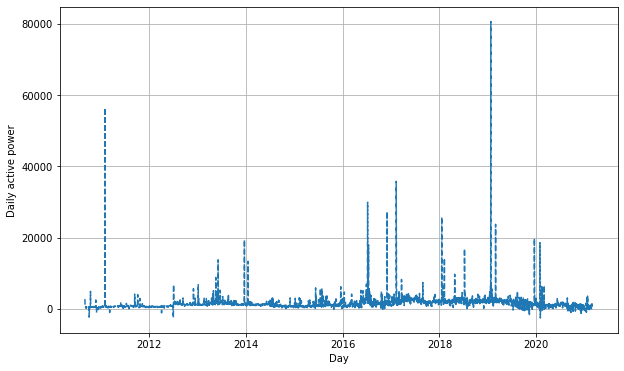

In [ ]:
# PLOT OF THE DAILY GLOBAL ACTIVE POWER OVER TIME
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Daily active power')

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_result = adfuller(df_daily['SysLoad'])
print(f'p-value: {round(adf_result[1],6)}')

p-value: 0.004254


In [ ]:
adf_result = adfuller(df_daily['GasPrice'])
print(f'p-value: {round(adf_result[1],6)}')

p-value: 0.045027


In [ ]:
adf_result = adfuller(df_daily['GasPrice'])
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [ ]:
adf_result = adfuller(df_daily['ElecPrice'])
print('Critical values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

Critical values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [ ]:
# Resetting the index
df_daily = df_daily.reset_index()
df_daily.head()

FullDate   Tmax    SysLoad  GasPrice  ElecPrice
0 2010-09-01  379.2  41565.380     88.56   2751.700
1 2010-09-02  369.6  38898.990     88.56    570.810
2 2010-09-03  439.2  41665.760    106.80    504.975
3 2010-09-04  328.8  35638.085     81.36    502.275
4 2010-09-05  357.6  35611.410    106.80    500.555

In [ ]:
#SELECTING COLUMNS FOR PREDICTION MODEL
model_df = df_daily[['FullDate', 'ElecPrice']]

# renaming of columns to 'ds' and 'y' respectively
model_data = model_df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

In [ ]:
# TRAIN/TEST SPLIT OF THE DATASET
train = model_data[:2757]
test = model_data[2757:]
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [ ]:
# Fitting of the train data to fbprophet model
from prophet import Prophet
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpld97x4n9/7172193v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpld97x4n9/ctt2vkqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18899', 'data', 'file=/tmp/tmpld97x4n9/7172193v.json', 'init=/tmp/tmpld97x4n9/ctt2vkqp.json', 'output', 'file=/tmp/tmpld97x4n9/prophet_modelb74n1dy5/prophet_model-20230130152746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make Predictions
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(test)
forecast.head()

ds        trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2018-03-20  2684.565824  116.764093  4893.934658  2684.565824  2684.565824   
1 2018-03-21  2685.359782  257.903971  4935.695501  2685.359782  2685.359782   
2 2018-03-22  2686.153740  213.784670  5034.896295  2686.153740  2686.153740   
3 2018-03-23  2686.947698  323.569556  5085.873742  2686.947698  2686.947698   
4 2018-03-24  2687.741656  -43.877238  4531.040973  2687.741656  2687.741656   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -155.040628           -155.040628           -155.040628    9.737379   
1       -2.567491             -2.567491             -2.567491  159.353195   
2       95.607310             95.607310             95.607310  257.107547   
3     -113.077820           -113.077820           -113.077820   50.273097   
4     -438.673661           -438.673661           -438.673661 -271.443120   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      9.737379      9.737379 -164.778008   -164.778008   -164.778008   
1    159.353195    159.353195 -161.920686   -161.920686   -161.920686   
2    257.107547    257.107547 -161.500237   -161.500237   -161.500237   
3     50.273097     50.273097 -163.350918   -163.350918   -163.350918   
4   -271.443120   -271.443120 -167.230541   -167.230541   -167.230541   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  2529.525196  
1                         0.0  2682.792291  
2                         0.0  2781.761050  
3                         0.0  2573.869878  
4                         0.0  2249.067995

In [ ]:
# yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
forecast[['ds','yhat','yhat_lower','yhat_upper','trend', 'trend_lower', 'trend_upper']]

ds         yhat  yhat_lower   yhat_upper        trend  \
0    2018-03-20  2529.525196  116.764093  4893.934658  2684.565824   
1    2018-03-21  2682.792291  257.903971  4935.695501  2685.359782   
2    2018-03-22  2781.761050  213.784670  5034.896295  2686.153740   
3    2018-03-23  2573.869878  323.569556  5085.873742  2686.947698   
4    2018-03-24  2249.067995  -43.877238  4531.040973  2687.741656   
...         ...          ...         ...          ...          ...   
1072 2021-02-24  3446.060747  498.482413  6363.982275  3535.688715   
1073 2021-02-25  3512.928139  502.367130  6639.038099  3536.482672   
1074 2021-02-26  3279.749616  412.683136  6251.553941  3537.276630   
1075 2021-02-27  2936.426367   85.997389  5941.367818  3538.070588   
1076 2021-02-28  2848.375916 -244.058536  5778.372436  3538.864546   

      trend_lower  trend_upper  
0     2684.565824  2684.565824  
1     2685.359782  2685.359782  
2     2686.153740  2686.153740  
3     2686.947698  2686.947698  
4     2687.741656  2687.741656  
...           ...          ...  
1072  1816.077995  5340.744051  
1073  1814.821029  5344.672973  
1074  1813.564063  5348.601894  
1075  1812.184947  5352.530816  
1076  1810.683680  5356.447135  

[1077 rows x 7 columns]

In [ ]:
# THE EVALUATION OF MODEL PERFORMANCE
from sklearn.metrics import mean_squared_error

def mape(test, forecast):
  mape = np.mean(np.abs(np.array(test['y']) - np.array(forecast['yhat']))/ np.array(test['y'])) *100
  rmse = np.sqrt(mean_squared_error(np.array(test['y']), np.array(forecast['yhat'])))
  return f'mape value is: {round(mape,2)} and rmse value is: {round(rmse,2)}'

In [ ]:
mape(test, forecast)

'mape value is: -133.47 and rmse value is: 3208.06'

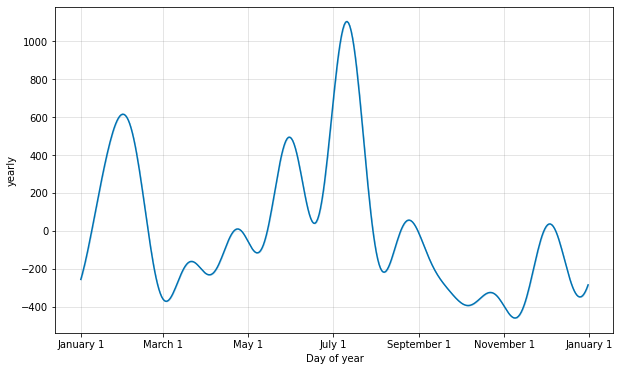

In [ ]:
from prophet.plot import plot_yearly
plot_yearly(model)

In [ ]:
multi_model = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                         'SysLoad':'add1',
                                         'Tmax':'add2',
                                         'GasPrice':'add3'})
multi_model.head()

ds   add2       add1    add3         y
0 2010-09-01  379.2  41565.380   88.56  2751.700
1 2010-09-02  369.6  38898.990   88.56   570.810
2 2010-09-03  439.2  41665.760  106.80   504.975
3 2010-09-04  328.8  35638.085   81.36   502.275
4 2010-09-05  357.6  35611.410  106.80   500.555

In [ ]:
# Assign train and test data
train2 = multi_model[:2757]
test2 = multi_model[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [ ]:
# Create multivariate model
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [ ]:
model2.fit(train2)

forecast2 = model2.predict(test2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpld97x4n9/oe0qlnf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpld97x4n9/ogn0nb4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75144', 'data', 'file=/tmp/tmpld97x4n9/oe0qlnf2.json', 'init=/tmp/tmpld97x4n9/ogn0nb4g.json', 'output', 'file=/tmp/tmpld97x4n9/prophet_modelri2vpk53/prophet_model-20230130152748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast2

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2018-03-20  1867.204510  -131.002161  4311.676572  1867.204510   
1    2018-03-21  1867.893046  -298.007260  4342.311550  1867.893046   
2    2018-03-22  1868.581583   732.818332  5109.531106  1868.581583   
3    2018-03-23  1869.270119   512.188422  4846.526802  1869.270119   
4    2018-03-24  1869.958655  -825.449313  3709.256642  1869.958655   
...         ...          ...          ...          ...          ...   
1072 2021-02-24  2605.315322 -1502.577700  3213.730323  1868.978053   
1073 2021-02-25  2606.003858  -908.999891  3671.621844  1868.572129   
1074 2021-02-26  2606.692394  -844.350088  3728.740810  1868.166204   
1075 2021-02-27  2607.380931 -1477.415350  3293.825100  1867.760280   
1076 2021-02-28  2608.069467 -1107.158475  3449.106860  1867.354355   

      trend_upper         add1   add1_lower   add1_upper      add2  ...  \
0     1867.204510  -856.286567  -856.286567  -856.286567  0.236280  ...   
1     1867.893046 -1026.281456 -1026.281456 -1026.281456  0.233477  ...   
2     1868.581583  -214.935967  -214.935967  -214.935967  0.219893  ...   
3     1869.270119  -274.867855  -274.867855  -274.867855  0.211915  ...   
4     1869.958655 -1076.321337 -1076.321337 -1076.321337  0.209975  ...   
...           ...          ...          ...          ...       ...  ...   
1072  3315.061718 -1372.192578 -1372.192578 -1372.192578  0.236495  ...   
1073  3316.034917 -1032.937260 -1032.937260 -1032.937260  0.238220  ...   
1074  3317.008116  -754.468564  -754.468564  -754.468564  0.235633  ...   
1075  3317.981315 -1010.907808 -1010.907808 -1010.907808  0.234124  ...   
1076  3320.716140  -913.449711  -913.449711  -913.449711  0.232399  ...   

          weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
0     -84.476147    -84.476147    -84.476147  -39.061079    -39.061079   
1      42.524741     42.524741     42.524741  -29.773204    -29.773204   
2     145.612882    145.612882    145.612882  -24.740713    -24.740713   
3     -44.306399    -44.306399    -44.306399  -23.822245    -23.822245   
4    -117.531858   -117.531858   -117.531858  -26.767060    -26.767060   
...          ...           ...           ...         ...           ...   
1072   42.524741     42.524741     42.524741 -433.744132   -433.744132   
1073  145.612882    145.612882    145.612882 -460.171529   -460.171529   
1074  -44.306399    -44.306399    -44.306399 -480.828796   -480.828796   
1075 -117.531858   -117.531858   -117.531858 -495.478359   -495.478359   
1076  -69.521370    -69.521370    -69.521370 -503.999794   -503.999794   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       -39.061079                   0.0                         0.0   
1       -29.773204                   0.0                         0.0   
2       -24.740713                   0.0                         0.0   
3       -23.822245                   0.0                         0.0   
4       -26.767060                   0.0                         0.0   
...            ...                   ...                         ...   
1072   -433.744132                   0.0                         0.0   
1073   -460.171529                   0.0                         0.0   
1074   -480.828796                   0.0                         0.0   
1075   -495.478359                   0.0                         0.0   
1076   -503.999794                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0  1986.764063  
1                            0.0  1978.166932  
2                            0.0  2898.308005  
3                            0.0  2582.549267  
4                            0.0  1435.761426  
...                          ...          ...  
1072                         0.0   957.503898  
1073                         0.0  1317.075756  
1074                         0.0  1380.909766  
1075                     

In [ ]:
def mape_2(test2,forecast2):
  mape2 = np.mean(np.abs(np.array(test2['y']) - np.array(forecast2.yhat))/ np.array(test2['y'])) *100
  rmse2 = np.sqrt(mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
  return f'mape value is: {round(mape2,2)} and rmse value is: {round(rmse2,2)}'

In [ ]:
mape_2(test2,forecast2)

'mape value is: -63.32 and rmse value is: 2707.61'

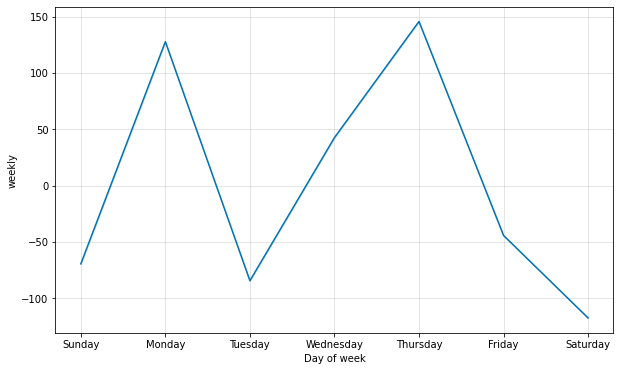

In [ ]:
# VISUALIZING EACH COMPONENTS
from prophet.plot import plot_weekly
plot_weekly(model2)

In [ ]:
multi_model_2 = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1','GasPrice':'add2'})
multi_model_2.drop('Tmax', axis=1,inplace=True)

In [ ]:
multi_model_2

ds         add1      add2         y
0    2010-09-01  41565.38000   88.5600  2751.700
1    2010-09-02  38898.99000   88.5600   570.810
2    2010-09-03  41665.76000  106.8000   504.975
3    2010-09-04  35638.08500   81.3600   502.275
4    2010-09-05  35611.41000  106.8000   500.555
...         ...          ...       ...       ...
3829 2021-02-24  -1525.49745  134.4000   634.770
3830 2021-02-25   4539.07855  130.5048   577.515
3831 2021-02-26   9517.02430  130.1808  1445.495
3832 2021-02-27   4932.88015  130.0800   488.980
3833 2021-02-28   6675.05485  131.6352   -98.985

[3834 rows x 4 columns]

In [ ]:
# ASSIGN TRAIN AND TEST DATA
train3 = multi_model_2[:2757]
test3 = multi_model_2[2757:]
print('train shape', train3.shape)
print('test shape', test3.shape)
train3

train shape (2757, 4)
test shape (1077, 4)


ds         add1      add2         y
0    2010-09-01  41565.38000   88.5600  2751.700
1    2010-09-02  38898.99000   88.5600   570.810
2    2010-09-03  41665.76000  106.8000   504.975
3    2010-09-04  35638.08500   81.3600   502.275
4    2010-09-05  35611.41000  106.8000   500.555
...         ...          ...       ...       ...
2752 2018-03-15  27139.02585  220.6272  2717.340
2753 2018-03-16  19710.46400  216.9600  2277.335
2754 2018-03-17   1079.34705  209.0400  1718.385
2755 2018-03-18  -4102.43795  203.9880  1088.015
2756 2018-03-19   8731.39945  199.2720  1998.305

[2757 rows x 4 columns]

In [ ]:
# CREATION OF MULTIVARIATE MODEL
model3 = Prophet()
model3.add_regressor('add1')
model3.add_regressor('add2')

In [ ]:
model3.fit(train3)

forecast3 = model3.predict(test3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpld97x4n9/8ibxntgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpld97x4n9/2f9fsgj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81671', 'data', 'file=/tmp/tmpld97x4n9/8ibxntgt.json', 'init=/tmp/tmpld97x4n9/2f9fsgj5.json', 'output', 'file=/tmp/tmpld97x4n9/prophet_modelsyna2ucx/prophet_model-20230130152750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
def mape_3(test3,forecast3):
  mape3 = np.mean(np.abs(np.array(test3['y']) - np.array(forecast3.yhat))/ np.array(test3['y'])) *100

# rmse2 = np.sqrt(mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
  return f'mape value is: {round(mape3,2)}'


In [ ]:
mape_3(test3,forecast3)

'mape value is: -63.92'